In [9]:
%pylab inline
import sklearn
from sklearn.neighbors import KNeighborsClassifier

Populating the interactive namespace from numpy and matplotlib


In [41]:
def genPoints(num,bk,nk,I):
    
    X=zeros([num,3])
    Y=transpose(append(zeros(int(num/2)),ones(int((num/2)))))
    for i in range((num)):
        a=random.randint(0,9)

        if(i<(num)/2):
            [[new,point]]=random.multivariate_normal(bk[a],I/5,1)
        else:
            [[new,point]]=random.multivariate_normal(nk[a],I/5,1)

        X[i]=[1.0,new,point]
    return X,Y

I=array([[1.0,0.0],[0.0,1.0]])
bk=random.multivariate_normal([1.0,0],I,10)
nk=random.multivariate_normal([0,1.0],I,10)
numTest=1000;
numTrain=200;

Xtrain,Ytrain=genPoints(numTrain,bk,nk,I)
Xtest,Ytest=genPoints(numTest,bk,nk,I)



(-1.3492669109245572, 2.92177840005417)

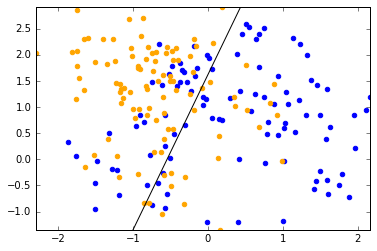

In [51]:
B=dot(linalg.inv(dot(transpose(Xtrain),Xtrain)),dot(transpose(Xtrain),Ytrain))

xmin,xmax,ymin,ymax=[min(Xtrain[:,1]),max(Xtrain[:,1]),min(Xtrain[:,2]),max(Xtrain[:,2])]
XLine=array([xmin,xmax])
yLine=-(XLine*B[1]+B[0]-0.5)/B[2]
scatter(Xtrain[:int(numTrain/2),1],Xtrain[:int(numTrain/2),2],color='b')
scatter(Xtrain[int(numTrain/2):,1],Xtrain[int(numTrain/2):,2],color='#FFA500')
plot(XLine,yLine,color='k')
xlim([xmin,xmax])
ylim([ymin,ymax])

(-1.3492669109245572, 2.92177840005417)

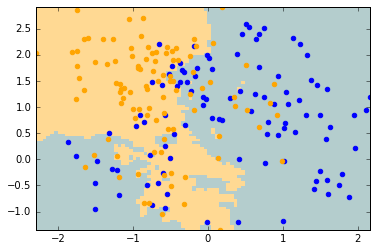

In [43]:
h=0.05
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(Xtrain[:,1:],Ytrain)
xx, yy = meshgrid(arange(xmin, xmax+0.5, h),
                         arange(ymin, ymax+0.5, h))
cmap_light = matplotlib.colors.ListedColormap(['#B4CDCD', '#ffd993'])
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx, yy, Z, cmap=cmap_light)
scatter(Xtrain[:int(numTrain/2),1],Xtrain[:int(numTrain/2),2],color='b')
scatter(Xtrain[int(numTrain/2):,1],Xtrain[int(numTrain/2):,2],color='#FFA500')
xlim([xmin,xmax])
ylim([ymin,ymax])

(-1.3492669109245572, 2.92177840005417)

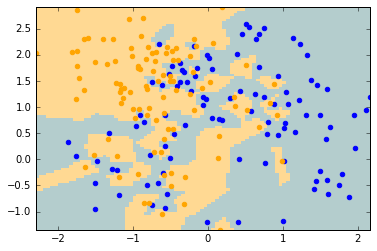

In [44]:
h=0.05
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xtrain[:,1:],Ytrain)
xx, yy = meshgrid(arange(xmin, xmax+0.5, h),
                         arange(ymin, ymax+0.5, h))
cmap_light = matplotlib.colors.ListedColormap(['#B4CDCD', '#ffd993'])
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx, yy, Z, cmap=cmap_light)
scatter(Xtrain[:int(numTrain/2),1],Xtrain[:int(numTrain/2),2],color='b')
scatter(Xtrain[int(numTrain/2):,1],Xtrain[int(numTrain/2):,2],color='#FFA500')
xlim([xmin,xmax])
ylim([ymin,ymax])

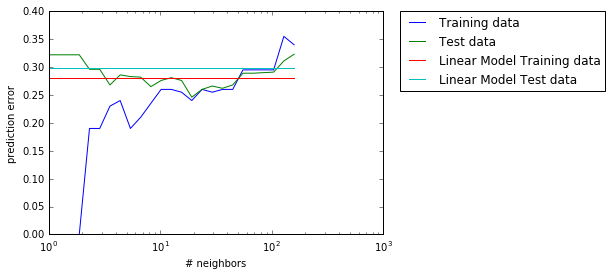

In [83]:
n=25
scoreTrain=zeros(n)
scoreTest=zeros(n)

for i,j in zip(logspace(0,2.2,n),range(n)):
    neigh = KNeighborsClassifier(n_neighbors=int(i))
    neigh.fit(Xtrain[:,1:],Ytrain)
    scoreTrain[j]=1-neigh.score(Xtrain[:,1:],Ytrain)
    scoreTest[j]=1-neigh.score(Xtest[:,1:],Ytest)
    
B=dot(linalg.inv(dot(transpose(Xtrain),Xtrain)),dot(transpose(Xtrain),Ytrain))

def linScore(X,Y,B):
    Ypred=dot(B,transpose(X))>0.5
    errors=0.0
    for i,j in zip(Y,Ypred):
        if(i!=j):
            errors+=1.0
    return errors/len(Y)

scoreLinTrain=linScore(Xtrain,Ytrain,B)
scoreLinTest=linScore(Xtest,Ytest,B)
    
plot(logspace(0,2.2,n),scoreTrain,label='Training data')
plot(logspace(0,2.2,n),scoreTest,label='Test data')

plot(logspace(0,2.2,2),[scoreLinTrain,scoreLinTrain],label='Linear Model Training data')
plot(logspace(0,2.2,2),[scoreLinTest,scoreLinTest],label='Linear Model Test data')

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel('# neighbors')
ylabel('prediction error')
xscale('log')